In [1]:
import pandas as pd

file_path = 'Sales Data.csv'  
sales_data = pd.read_csv(file_path)

print(sales_data.head(10))


   Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0           0    295665          Macbook Pro Laptop                 1   
1           1    295666          LG Washing Machine                 1   
2           2    295667        USB-C Charging Cable                 1   
3           3    295668            27in FHD Monitor                 1   
4           4    295669        USB-C Charging Cable                 1   
5           5    295670       AA Batteries (4-pack)                 1   
6           6    295671        USB-C Charging Cable                 1   
7           7    295672        USB-C Charging Cable                 2   
8           8    295673  Bose SoundSport Headphones                 1   
9           9    295674      AAA Batteries (4-pack)                 4   

   Price Each           Order Date                           Purchase Address  \
0     1700.00  2019-12-30 00:01:00     136 Church St, New York City, NY 10001   
1      600.00  2019-12-29 07:03:00

In [3]:
null_values_count = sales_data.isnull().sum()
print(null_values_count)


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [5]:

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
print(sales_data.head(10))


   Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0           0    295665          Macbook Pro Laptop                 1   
1           1    295666          LG Washing Machine                 1   
2           2    295667        USB-C Charging Cable                 1   
3           3    295668            27in FHD Monitor                 1   
4           4    295669        USB-C Charging Cable                 1   
5           5    295670       AA Batteries (4-pack)                 1   
6           6    295671        USB-C Charging Cable                 1   
7           7    295672        USB-C Charging Cable                 2   
8           8    295673  Bose SoundSport Headphones                 1   
9           9    295674      AAA Batteries (4-pack)                 4   

   Price Each          Order Date                           Purchase Address  \
0     1700.00 2019-12-30 00:01:00     136 Church St, New York City, NY 10001   
1      600.00 2019-12-29 07:03:00   

In [7]:

sales_data['Month'] = sales_data['Month'].apply(lambda x: pd.Timestamp(f'2024-{x:02d}-01').strftime('%B'))

print(sales_data.head(10))


   Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0           0    295665          Macbook Pro Laptop                 1   
1           1    295666          LG Washing Machine                 1   
2           2    295667        USB-C Charging Cable                 1   
3           3    295668            27in FHD Monitor                 1   
4           4    295669        USB-C Charging Cable                 1   
5           5    295670       AA Batteries (4-pack)                 1   
6           6    295671        USB-C Charging Cable                 1   
7           7    295672        USB-C Charging Cable                 2   
8           8    295673  Bose SoundSport Headphones                 1   
9           9    295674      AAA Batteries (4-pack)                 4   

   Price Each          Order Date                           Purchase Address  \
0     1700.00 2019-12-30 00:01:00     136 Church St, New York City, NY 10001   
1      600.00 2019-12-29 07:03:00   

In [9]:
sales_data.drop(columns=['Hour'], inplace=True)

print(sales_data.head(10))

   Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0           0    295665          Macbook Pro Laptop                 1   
1           1    295666          LG Washing Machine                 1   
2           2    295667        USB-C Charging Cable                 1   
3           3    295668            27in FHD Monitor                 1   
4           4    295669        USB-C Charging Cable                 1   
5           5    295670       AA Batteries (4-pack)                 1   
6           6    295671        USB-C Charging Cable                 1   
7           7    295672        USB-C Charging Cable                 2   
8           8    295673  Bose SoundSport Headphones                 1   
9           9    295674      AAA Batteries (4-pack)                 4   

   Price Each          Order Date                           Purchase Address  \
0     1700.00 2019-12-30 00:01:00     136 Church St, New York City, NY 10001   
1      600.00 2019-12-29 07:03:00   

In [11]:

iphone_sales = sales_data[sales_data['Product'] == 'iPhone']['Sales'].sum()
print(f'Total sales of iPhone product: {iphone_sales}')


Total sales of iPhone product: 4794300.0


In [13]:

december_sales = sales_data[sales_data['Month'] == 'December']
top_5_products_december = december_sales.groupby('Product')['Sales'].sum().nlargest(5)
print(top_5_products_december)


Product
Macbook Pro Laptop        1093100.00
iPhone                     634200.00
ThinkPad Laptop            538994.61
Google Phone               429000.00
27in 4K Gaming Monitor     336951.36
Name: Sales, dtype: float64


In [15]:

pivot_table = sales_data.pivot_table(values='Sales', index='Product', columns='Month', aggfunc='sum')
print(pivot_table)


Month                           April     August    December   February  \
Product                                                                   
20in Monitor                 43226.07   28707.39    62584.31   27057.54   
27in 4K Gaming Monitor      220734.34  171595.60   336951.36  166525.73   
27in FHD Monitor            110392.64   73645.09   144290.38   71245.25   
34in Ultrawide Monitor      248513.46  144396.20   322611.51  158835.82   
AA Batteries (4-pack)        10832.64    7019.52    14300.16    6662.40   
AAA Batteries (4-pack)        8787.61    6042.79    12680.59    5896.28   
Apple Airpods Headphones    227850.00  151350.00   311400.00  151800.00   
Bose SoundSport Headphones  128687.13   88091.19   182381.76   84091.59   
Flatscreen TV               138000.00   99300.00   199800.00   93900.00   
Google Phone                348000.00  216600.00   429000.00  228600.00   
LG Dryer                     46800.00   27600.00    51600.00   22800.00   
LG Washing Machine       

In [17]:

sales_data['Order Date'] = sales_data['Order Date'].dt.date

daily_sales = sales_data.groupby('Order Date')['Sales'].sum()

highest_sales_day = daily_sales.idxmax()
highest_sales_amount = daily_sales.max()
print(f'Day with the highest sales: {highest_sales_day} with sales amount: {highest_sales_amount}')


Day with the highest sales: 2019-12-04 with sales amount: 166727.69


In [19]:

quantity_sold = sales_data.groupby('Product')['Quantity Ordered'].sum()

top_5_products_quantity = quantity_sold.nlargest(5)
print(top_5_products_quantity)


Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64


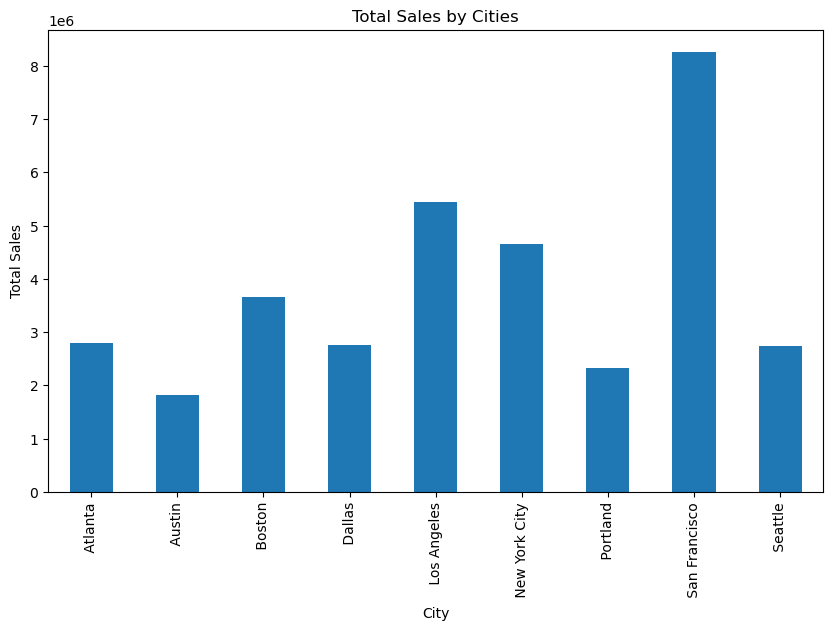

In [21]:
import matplotlib.pyplot as plt

city_sales = sales_data.groupby('City')['Sales'].sum()

city_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


In [23]:

city_codes = {
    'Atlanta': 'ATL', 'Austin': 'AU', 'Boston': 'BO', 'Dallas': 'DA',
    'Los Angeles': 'LA', 'New York City': 'NY', 'Portland': 'PORT',
    'San Francisco': 'SF', 'Seattle': 'SA'
}


sales_data['City_Codes'] = sales_data['City'].map(city_codes)


print(sales_data.head(10))


   Unnamed: 0  Order ID                     Product  Quantity Ordered  \
0           0    295665          Macbook Pro Laptop                 1   
1           1    295666          LG Washing Machine                 1   
2           2    295667        USB-C Charging Cable                 1   
3           3    295668            27in FHD Monitor                 1   
4           4    295669        USB-C Charging Cable                 1   
5           5    295670       AA Batteries (4-pack)                 1   
6           6    295671        USB-C Charging Cable                 1   
7           7    295672        USB-C Charging Cable                 2   
8           8    295673  Bose SoundSport Headphones                 1   
9           9    295674      AAA Batteries (4-pack)                 4   

   Price Each  Order Date                           Purchase Address  \
0     1700.00  2019-12-30     136 Church St, New York City, NY 10001   
1      600.00  2019-12-29        562 2nd St, New Yor

In [25]:

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.set_index('Order Date', inplace=True)


resampled_sales = sales_data.groupby('City')['Sales'].resample('6M').sum()


print(resampled_sales)


City           Order Date
Atlanta        2019-01-31     149159.54
               2019-07-31    1363261.52
               2020-01-31    1283077.52
Austin         2019-01-31      87587.08
               2019-07-31     891037.70
               2020-01-31     840956.97
Boston         2019-01-31     199761.60
               2019-07-31    1744687.96
               2020-01-31    1717192.45
Dallas         2019-01-31     141747.56
               2019-07-31    1328072.56
               2020-01-31    1298155.28
Los Angeles    2019-01-31     287601.91
               2019-07-31    2667810.83
               2020-01-31    2497158.06
New York City  2019-01-31     259250.67
               2019-07-31    2238073.29
               2020-01-31    2166993.47
Portland       2019-01-31     114832.57
               2019-07-31    1154348.98
               2020-01-31    1051309.06
San Francisco  2019-01-31     433103.45
               2019-07-31    4085960.22
               2020-01-31    3743140.24
Seattle       

C:\Users\syava\AppData\Local\Temp\ipykernel_8052\3594096799.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_sales = sales_data.groupby('City')['Sales'].resample('6M').sum()
